In [1]:
# default_exp diff_analysis

## Unit Tests

Simulate random, unbiased data and check that the resulting p-value distributions is reasonably similary to a uniform distribution

In [2]:
import pandas as pd
import numpy as np
import alphaquant.diffquant.background_distributions as aqbg
num_vals = 10000
rand1 = np.random.normal(loc=0 ,size=num_vals)
rand2 = np.random.normal(loc=0, size=num_vals)
rand3 = np.random.normal(loc=0, size=num_vals)
rand4 = np.random.normal(loc=0, size=num_vals)
rand5 = np.random.normal(loc=0, size=num_vals)

randarray = pd.DataFrame({1:rand1, 2:rand2, 3:rand3, 4:rand4, 5:rand5})
#display(randarray)
condbg = aqbg.ConditionBackgrounds(randarray, {})

t_ion2nonan_sw 0.020788908004760742
t_intensity_selection 0.3151571750640869


In [3]:
#hide
import numpy as np
import alphaquant.diffquant.diff_analysis as aqdiff

def test_diffreg_pep(condbg, noNanvals_from, bg_idx1, noNanvals_to, bg_idx2):
    bgdist_from = condbg.backgrounds[bg_idx1]
    bgdist_to = condbg.backgrounds[bg_idx2]
    p2z = {}
    diffbg = aqbg.SubtractedBackgrounds(bgdist_from, bgdist_to, p2z)
    diffion = aqdiff.DifferentialIon(noNanvals_from, noNanvals_to, diffbg ,"", outlier_correction=False)
    #print(f'from {noNanvals_from} to {noNanvals_to} pval {diffion.p_val}')
    return diffion.p_val


noNanvals_from = np.array([1,2,1,2])
noNanvals_to = np.array([2.1,1.1,1.9,0.9])
bg_idx1 = np.random.randint(0, len(condbg.backgrounds))
bg_idx2 = np.random.randint(0, len(condbg.backgrounds))
pval = test_diffreg_pep(condbg, noNanvals_from, 0, noNanvals_to, 1)

assert(pval>0.95)

In [8]:
#hide
import random
import matplotlib.pyplot as plt
p2z= {}
def test_noreg_pepdist(condbg, num_samplings):
    res = []
    bg_idxs = list(range(len(condbg.backgrounds)))

    for i in range(num_samplings):
        vals1 = 20+np.random.randn(3)
        vals2 =  20+np.random.randn(3)
        pval = test_diffreg_pep(condbg, vals1, 0, vals2, 1)
        res.append(pval)
    return res

pvals = test_noreg_pepdist(condbg, 1000)


KstestResult(statistic=0.056, pvalue=0.08689937254547132)


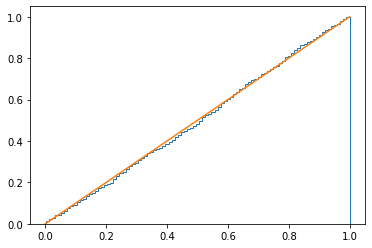

In [9]:
#hide
import scipy.stats
unidist = np.random.uniform(size=1000)

res = scipy.stats.ks_2samp(pvals, unidist)
print(res)
plt.hist(pvals,99,cumulative=True,density=True, histtype='step')
x = np.linspace(0,1,100)
plt.plot(x, x)
plt.show()

assert res[0]>0.01